In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

In [3]:
df = pd.read_csv('kindle_reviews.csv', keep_default_na=False)
df = df.rename(columns={'Unnamed: 0': 'Id'})

print('Data Set Shape = {}'.format(df.shape))
print('Data Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))
print(df.columns)

Data Set Shape = (982619, 10)
Data Set Memory Usage = 74.97 MB
Index(['Id', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


# Cardinality

In [4]:
print("Number of unique books: {}".format(df['asin'].nunique()))
print("Number of unique reviewers: {}".format(df['reviewerID'].nunique()))

Number of unique books: 61934
Number of unique reviewers: 68223


In [5]:
reviewsperbook = df.groupby('asin')['overall'].value_counts(dropna=False)

#Build stacked bar histogram if possible

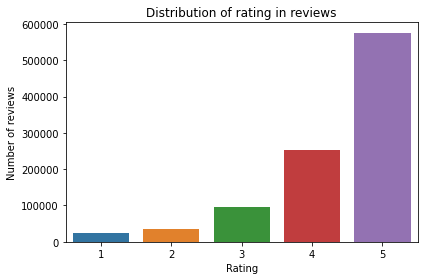

In [6]:
distribution = df['overall'].value_counts(dropna=False)

fig = sns.barplot(distribution.index, distribution)
fig.set(xlabel='Rating', ylabel='Number of reviews', title="Distribution of rating in reviews")
fig.get_figure().tight_layout()
fig.get_figure().savefig("Distributuon_of_rating.png")

# Meta Features

In [7]:
#remove text with images
df = df[~df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)]

print(df.count())

df['punctuation'] = df['reviewText'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

Id                982590
asin              982590
helpful           982590
overall           982590
reviewText        982590
reviewTime        982590
reviewerID        982590
reviewerName      982590
summary           982590
unixReviewTime    982590
dtype: int64


Get the number of punctuations in text by rating

Id                962627
asin              962627
helpful           962627
overall           962627
reviewText        962627
reviewTime        962627
reviewerID        962627
reviewerName      962627
summary           962627
unixReviewTime    962627
punctuation       962627
dtype: int64


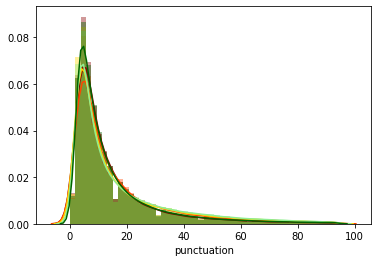

In [8]:
#remove outliers
df_outliers = df[np.abs(df['punctuation']-df['punctuation'].mean())<=(3*df['punctuation'].std())]

rating1 = df_outliers['overall']==1
rating2 = df_outliers['overall']==2
rating3 = df_outliers['overall']==3
rating4 = df_outliers['overall']==4
rating5 = df_outliers['overall']==5

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df_outliers['punctuation'].max())
print(df_outliers.count())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

sns.distplot(df_outliers.loc[rating1]['punctuation'], label='Rating 1', color='darkred')
sns.distplot(df_outliers.loc[rating2]['punctuation'], label='Rating 2', color='orangered')
sns.distplot(df_outliers.loc[rating3]['punctuation'], label='Rating 3', color='gold')
sns.distplot(df_outliers.loc[rating4]['punctuation'], label='Rating 4', color='lightgreen')
sns.distplot(df_outliers.loc[rating5]['punctuation'], label='Rating 5', color='darkgreen')

Get average word count

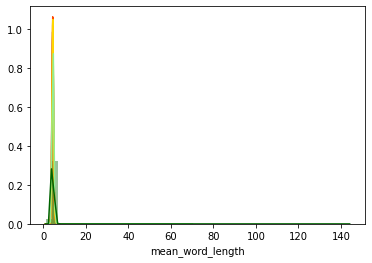

In [12]:
df['mean_word_length'] = df['reviewText'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#Detects HTML reviews
#print(df.loc[df['punctuation'].argmax()]['reviewText'])
#print(df['punctuation'].max())
#print(df[df['reviewText'].str.contains("\.jpg|\.png|\.jpeg|\.tiff|\.gif|\.bmp|\.heif", regex=True, na=False)].count())
#print(df.loc[df['Id'] == 361]['reviewText'].to_string())

sns.distplot(df.loc[rating1]['mean_word_length'], label='Rating 1', color='darkred')
sns.distplot(df.loc[rating2]['mean_word_length'], label='Rating 2', color='orangered')
sns.distplot(df.loc[rating3]['mean_word_length'], label='Rating 3', color='gold')
sns.distplot(df.loc[rating4]['mean_word_length'], label='Rating 4', color='lightgreen')
sns.distplot(df.loc[rating5]['mean_word_length'], label='Rating 5', color='darkgreen')

# N-Grams

In [21]:
def generate_ngrams(text, n_gram=1):
    token = text.split()
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

In [22]:
from collections import defaultdict

rating1_unigrams = defaultdict(int)
rating2_unigrams = defaultdict(int)
rating3_unigrams = defaultdict(int)
rating4_unigrams = defaultdict(int)
rating5_unigrams = defaultdict(int)

Uni-gram

In [23]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review):
        rating1_unigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review):
        rating2_unigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review):
        rating3_unigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review):
        rating4_unigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review):
        rating5_unigrams[word] += 1

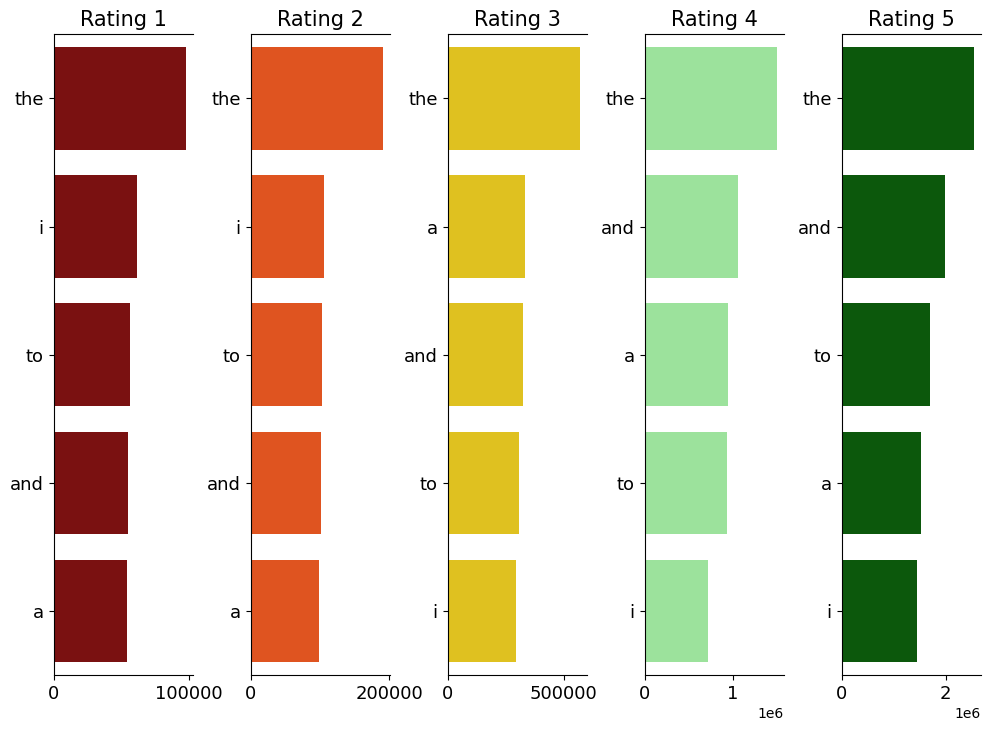

In [35]:
df_rating1_unigrams = pd.DataFrame(sorted(rating1_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_unigrams = pd.DataFrame(sorted(rating2_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_unigrams = pd.DataFrame(sorted(rating3_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_unigrams = pd.DataFrame(sorted(rating4_unigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_unigrams = pd.DataFrame(sorted(rating5_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(10, 7), dpi=100)
plt.tight_layout()

N = 5 #only select top n unigrams

sns.barplot(y=df_rating1_unigrams[0].values[:N], x=df_rating1_unigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_unigrams[0].values[:N], x=df_rating2_unigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_unigrams[0].values[:N], x=df_rating3_unigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_unigrams[0].values[:N], x=df_rating4_unigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_unigrams[0].values[:N], x=df_rating5_unigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

Bi-gram

In [38]:
rating1_bigrams = defaultdict(int)
rating2_bigrams = defaultdict(int)
rating3_bigrams = defaultdict(int)
rating4_bigrams = defaultdict(int)
rating5_bigrams = defaultdict(int)

In [39]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating1_bigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating2_bigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating3_bigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating4_bigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 2):
        rating5_bigrams[word] += 1

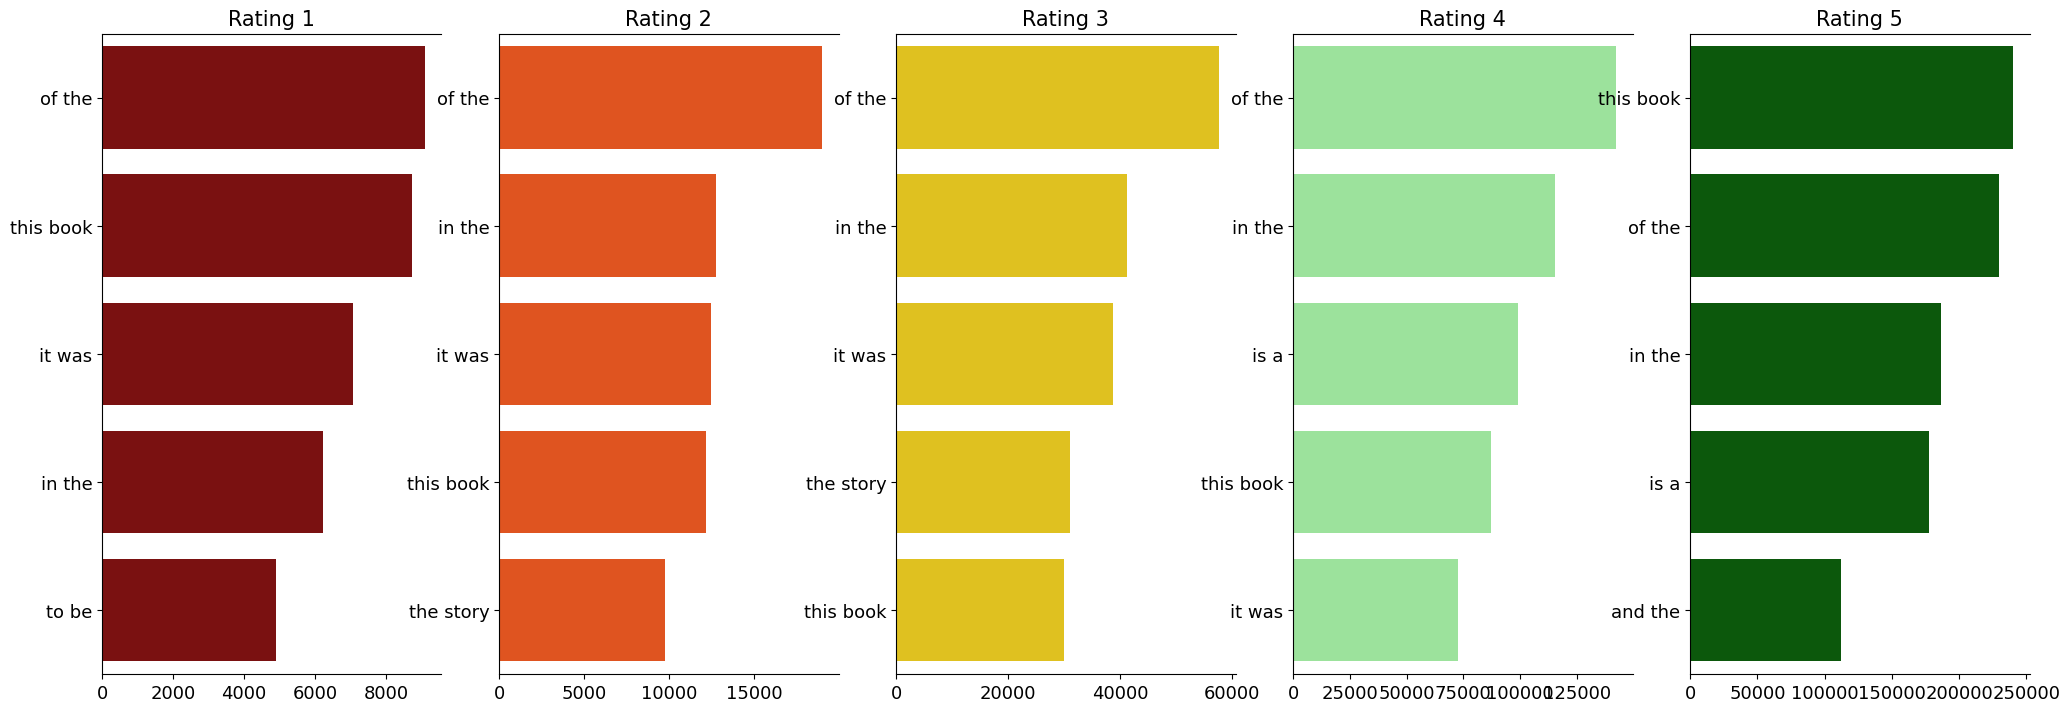

In [41]:
df_rating1_bigrams = pd.DataFrame(sorted(rating1_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_bigrams = pd.DataFrame(sorted(rating2_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_bigrams = pd.DataFrame(sorted(rating3_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_bigrams = pd.DataFrame(sorted(rating4_bigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_bigrams = pd.DataFrame(sorted(rating5_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(20, 7), dpi=100)
plt.tight_layout()

N = 5 #only select top n unigrams

sns.barplot(y=df_rating1_bigrams[0].values[:N], x=df_rating1_bigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_bigrams[0].values[:N], x=df_rating2_bigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_bigrams[0].values[:N], x=df_rating3_bigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_bigrams[0].values[:N], x=df_rating4_bigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_bigrams[0].values[:N], x=df_rating5_bigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

In [42]:
rating1_trigrams = defaultdict(int)
rating2_trigrams = defaultdict(int)
rating3_trigrams = defaultdict(int)
rating4_trigrams = defaultdict(int)
rating5_trigrams = defaultdict(int)

In [43]:
for review in df[rating1]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating1_trigrams[word] += 1

for review in df[rating2]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating2_trigrams[word] += 1

for review in df[rating3]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating3_trigrams[word] += 1

for review in df[rating4]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating4_trigrams[word] += 1

for review in df[rating5]['reviewText']:
    for word in generate_ngrams(review, n_gram = 3):
        rating5_trigrams[word] += 1

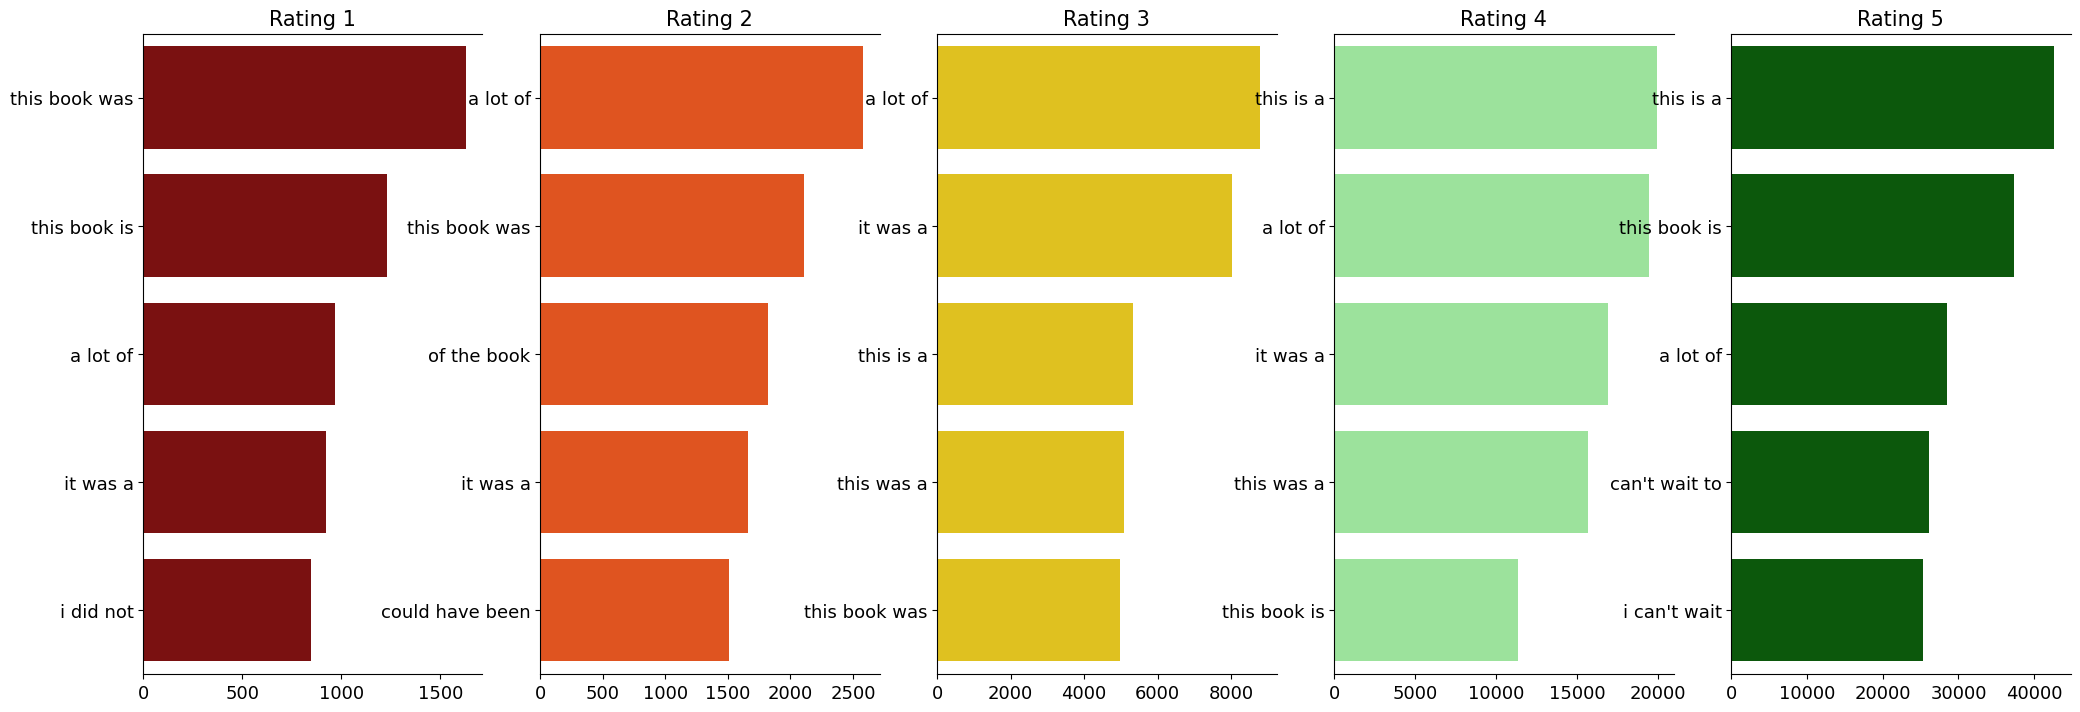

In [44]:
df_rating1_trigrams = pd.DataFrame(sorted(rating1_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating2_trigrams = pd.DataFrame(sorted(rating2_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating3_trigrams = pd.DataFrame(sorted(rating3_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating4_trigrams = pd.DataFrame(sorted(rating4_trigrams.items(), key=lambda x: x[1])[::-1])
df_rating5_trigrams = pd.DataFrame(sorted(rating5_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=5, figsize=(20, 7), dpi=100)
plt.tight_layout()

N = 5 #only select top n unigrams

sns.barplot(y=df_rating1_trigrams[0].values[:N], x=df_rating1_trigrams[1].values[:N], ax=axes[0], color='darkred')
sns.barplot(y=df_rating2_trigrams[0].values[:N], x=df_rating2_trigrams[1].values[:N], ax=axes[1], color='orangered')
sns.barplot(y=df_rating3_trigrams[0].values[:N], x=df_rating3_trigrams[1].values[:N], ax=axes[2], color='gold')
sns.barplot(y=df_rating4_trigrams[0].values[:N], x=df_rating4_trigrams[1].values[:N], ax=axes[3], color='lightgreen')
sns.barplot(y=df_rating5_trigrams[0].values[:N], x=df_rating5_trigrams[1].values[:N], ax=axes[4], color='darkgreen')

for i in range(5):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Rating 1', fontsize=15)
axes[1].set_title(f'Rating 2', fontsize=15)
axes[2].set_title(f'Rating 3', fontsize=15)
axes[3].set_title(f'Rating 4', fontsize=15)
axes[4].set_title(f'Rating 5', fontsize=15)

plt.show()

In [ ]:
8